In [25]:
using Printf, PyPlot, DelimitedFiles;
using Revise;
using MDToolbox;
PyPlot.plt.style.use("seaborn-colorblind");
ENV["COLUMNS"] = 110; #display width for MDToolbox

### Potential energy function and its gradients

In [26]:
#V(x; k=1.0) = sum(- (1.0 / 2.0) .* k .* x.^2 .+ (1.0 ./ 4.0) .* k .* x.^4)
V(x; k=1.0) = sum((1.0 .- x.^2).^2 .- 0.25 .* x)
V([0.0])

1.0

In [27]:
#grad(x; k= 1.0) =  - k .* x .+ k .* x.^3
grad(x; k=1.0) = -2.0.*(1.0 .- x.^2).*2.0.*x .- 0.25

grad (generic function with 1 method)

### Molecular dynamics

In [28]:
nstep = 1000000;
temperature = 0.04;

x = [-1.0]

io = open("single.dat", "w")

x = propagate_md(grad, x, temperature, nstep=nstep, io=io);

close(io)

### Trajectory analysis

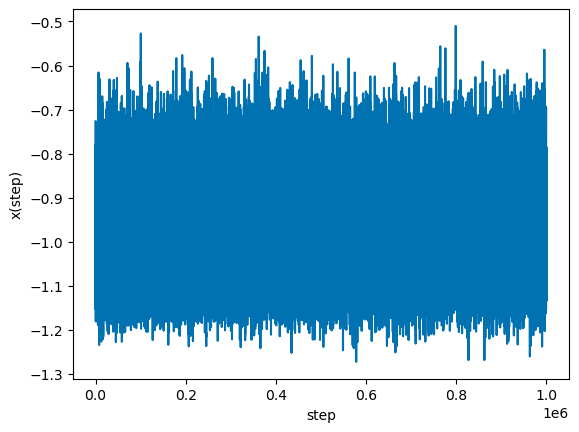

PyObject Text(24.000000000000007, 0.5, 'x(step)')

In [29]:
data = readdlm("single.dat");
traj_temp = data[:, 1]
traj = data[:, 2]

plot(traj)
xlabel("step")
ylabel("x(step)")

In [30]:
x_grid = range(-1.3, 1.3, length=100);
pmf_theory = V.(x_grid, k=1) ./ temperature[1]
pmf_theory .= pmf_theory .- minimum(pmf_theory);

In [31]:
pmf_observed, _ = compute_pmf(traj, grid_x = collect(x_grid), bandwidth=0.05);

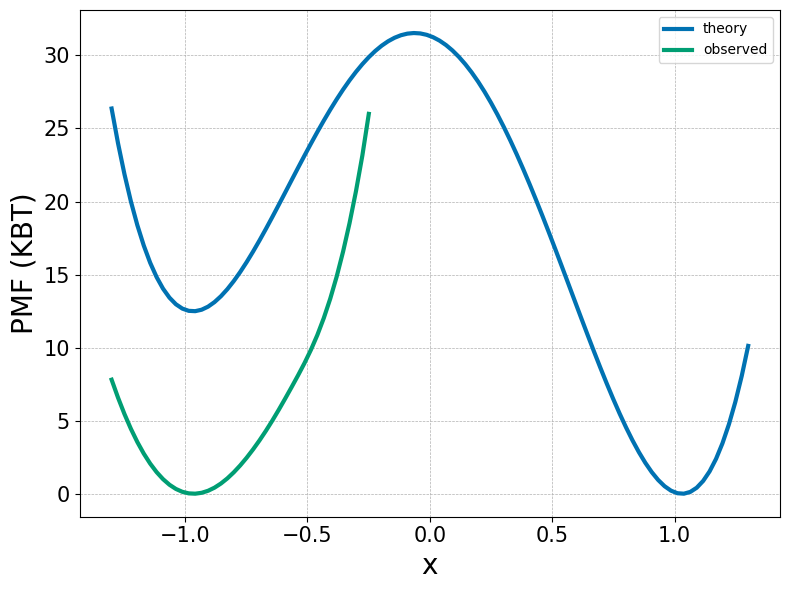

In [32]:
fig, ax = subplots(figsize=(8, 6))
ax.plot(x_grid, pmf_theory, linewidth=3)
xlabel("x",fontsize=20)
ylabel("PMF (KBT)",fontsize=20)

ax.plot(x_grid, pmf_observed, linewidth=3)

ax.legend(["theory", "observed"])

ax.xaxis.set_tick_params(which="major",labelsize=15)
ax.yaxis.set_tick_params(which="major",labelsize=15)
ax.grid(linestyle="--", linewidth=0.5)
tight_layout()
savefig("md_single.png", dpi=350)